In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Stock is above 200 Day moving average .Then buy next day open. 10 persiod RSI is below 30. Sell- 10 period Rsi is above 40 or after 10 trading days


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [ ]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [ ]:
tickers.dropna(inplace=True)

In [ ]:
tickers

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [ ]:
tickers =  tickers.Symbol.to_list()

In [ ]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [ ]:
tickers = [i.replace(".", "-") for i in tickers]

In [ ]:
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [ ]:
tickers.pop(125)

'CEG'

In [ ]:
tickers.pop(90)

'CARR'

In [ ]:
tickers.pop(196)

'FTV'

In [ ]:
tickers.pop(195)



'FTNT'

In [ ]:
tickers.pop(193)

'FMC'

In [ ]:
tickers.pop(194)

'FOXA'

In [ ]:
tickers.pop(197)

'GEHC'

In [ ]:
tickers.pop(126)

'CTVA'

In [ ]:
tickers.pop(124)

'COO'

In [ ]:
tickers.pop(148)

'DOW'

In [ ]:
tickers.pop(147)

'DOV'

In [ ]:
#tickers.pop(489)

In [ ]:
def RSIcalc(asset):
    df = yf.download(asset, start="2016-01-01")
    df["MA200"] = df["Adj Close"].rolling(window=200).mean()
    df["price change"] = df["Adj Close"].pct_change()
    #definistion of upmoves and downmoves
    df["Upmove"] = df["price change"].apply(lambda x: x if x > 0 else 0 )
    df["Downmove"] = df["price change"].apply(lambda x: abs(x) if x < 0 else 0)
    df["avg Up"] = df["Upmove"].ewm(span = 19).mean()
    df["avg Down"] = df["Downmove"].ewm(span = 19).mean()
    df = df.dropna()
    df["RS"] = df["avg Up"] / df["avg Down"]
    df["RSI"] = df["RS"].apply(lambda x: 100-(100)/(x+1))
    df.loc[(df["Adj Close"] > df["MA200"]) & (df["RSI"] < 30), "Buy"] = 'Yes'
    df.loc[(df["Adj Close"] < df["MA200"]) | (df["RSI"] > 30), "Buy"] = 'No'
    return df



In [ ]:
RSIcalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2016-10-17 00:00:00-04:00,170.539993,171.089996,169.940002,170.210007,139.599060,1229200,136.107507,-0.000704,0.000000,0.000704,0.001528,0.003211,0.476050,32.251628,No
2016-10-18 00:00:00-04:00,171.679993,171.910004,169.839996,169.949997,139.385834,1185600,136.214308,-0.001527,0.000000,0.001527,0.001376,0.003042,0.452150,31.136586,No
2016-10-19 00:00:00-04:00,170.800003,170.940002,169.660004,169.910004,139.353012,1164200,136.318373,-0.000235,0.000000,0.000235,0.001238,0.002762,0.448295,30.953275,No
2016-10-20 00:00:00-04:00,169.570007,170.339996,168.990005,169.860001,139.312027,1210500,136.434170,-0.000294,0.000000,0.000294,0.001114,0.002515,0.443052,30.702425,No
2016-10-21 00:00:00-04:00,168.110001,169.559998,167.720001,169.500000,139.016785,2013200,136.562639,-0.002119,0.000000,0.002119,0.001003,0.002475,0.405120,28.831676,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 00:00:00-05:00,120.610001,123.900002,120.410004,122.620003,122.620003,3412200,129.637465,0.016328,0.016328,0.000000,0.007579,0.008596,0.881737,46.857601,No
2023-01-24 00:00:00-05:00,116.040001,120.000000,114.500000,115.000000,115.000000,10276500,129.484564,-0.062143,0.000000,0.062143,0.006821,0.013950,0.488958,32.838953,No
2023-01-25 00:00:00-05:00,114.500000,116.239998,112.750000,112.930000,112.930000,5993200,129.323008,-0.018000,0.000000,0.018000,0.006139,0.014355,0.427648,29.954737,No


In [ ]:
def getSignals(df):
  Buying_dates = []
  Selling_dates = []

  for i in range(len(df) - 11):
    if 'Yes' in df['Buy'].iloc[i]:

      Buying_dates.append(df.iloc[i+1].name)
      for j in range(1,11):
        if df["RSI"].iloc[i + j] > 40:
          Selling_dates.append(df.iloc[i+j+1].name)
          break
        elif j == 10:
            Selling_dates.append(df.iloc[i+j+1].name)

  return Buying_dates, Selling_dates


In [ ]:
frame = RSIcalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


In [ ]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


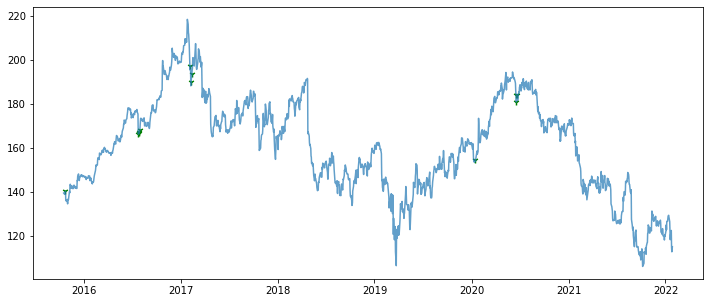

In [ ]:
plt.figure(figsize= (12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]["Adj Close"], marker = "1", c="g")
plt.plot(frame["Adj Close"], alpha = 0.7)

In [ ]:
sell

[Timestamp('2016-10-25 00:00:00-0400', tz='America/New_York'),
 Timestamp('2017-08-02 00:00:00-0400', tz='America/New_York'),
 Timestamp('2017-08-02 00:00:00-0400', tz='America/New_York'),
 Timestamp('2017-08-02 00:00:00-0400', tz='America/New_York'),
 Timestamp('2017-08-02 00:00:00-0400', tz='America/New_York'),
 Timestamp('2018-02-14 00:00:00-0500', tz='America/New_York'),
 Timestamp('2018-02-14 00:00:00-0500', tz='America/New_York'),
 Timestamp('2018-02-14 00:00:00-0500', tz='America/New_York'),
 Timestamp('2021-01-20 00:00:00-0500', tz='America/New_York'),
 Timestamp('2021-06-28 00:00:00-0400', tz='America/New_York'),
 Timestamp('2021-06-28 00:00:00-0400', tz='America/New_York'),
 Timestamp('2021-06-28 00:00:00-0400', tz='America/New_York')]

In [ ]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) /frame.loc[buy].Open.values

In [ ]:
Profits

array([-0.01841872,  0.01366927,  0.02033747,  0.01195283,  0.01595001,
        0.00852711,  0.02154845,  0.00861573,  0.01892706, -0.0052846 ,
        0.01409035,  0.01120925])

In [ ]:
wins = [i for i in Profits if i > 0]

In [ ]:
len(wins)/len(Profits)

0.8333333333333334

In [ ]:
len(Profits)

12

In [ ]:
len(tickers)

448

In [ ]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)):
  if len(tickers) !=  0:
    frame = RSIcalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values) /frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
matrixprofits

[array([-0.01841872,  0.01366927,  0.02033747,  0.01195283,  0.01595001,
         0.00852711,  0.02154845,  0.00861573,  0.01892706, -0.0052846 ,
         0.01409035,  0.01120925]),
 array([ 0.00066135,  0.01181451,  0.00799468,  0.00487052,  0.01954175,
         0.02925172,  0.035592  ,  0.00256128,  0.00957996,  0.0163205 ,
         0.01858736,  0.02010421,  0.02421226,  0.01428804, -0.06486643,
        -0.06770982, -0.07665663, -0.04341713, -0.05752269, -0.02632272,
        -0.01997127, -0.04882485, -0.03817413]),
 array([-0.01643463, -0.01215036, -0.00300789,  0.00984303,  0.03690624,
         0.03808804,  0.03272683,  0.03992897, -0.03944423, -0.01421402,
        -0.01194079, -0.02669779, -0.00101519, -0.03808728, -0.01475671,
        -0.00970417, -0.00570343, -0.01017271,  0.01217639,  0.01982446,
         0.05310843]),
 array([ 0.02342465, -0.07677542, -0.08030956, -0.0305759 ,  0.01648765,
        -0.01999576, -0.01180852,  0.00931341,  0.00139677,  0.01913614,
         0.00011

In [ ]:
len(matrixprofits)

448

In [ ]:
allprofit = []

for i in matrixprofits:
  for e in i:
    allprofit.append(e)

In [ ]:
allprofit

[-0.018418724518970305,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 -0.005284596182899224,
 0.014090350783795424,
 0.011209247430109006,
 0.0006613487410321818,
 0.011814506733969513,
 0.007994683990910465,
 0.004870516484864003,
 0.01954175478300225,
 0.029251722452651473,
 0.0355920030440987,
 0.0025612768027672398,
 0.009579964433639728,
 0.016320495140930147,
 0.018587360858383476,
 0.020104206846912765,
 0.024212257096934368,
 0.01428804303835597,
 -0.06486642513261867,
 -0.06770981923645132,
 -0.07665662704245724,
 -0.04341712997495395,
 -0.05752268703694439,
 -0.026322723597021428,
 -0.019971267029204817,
 -0.04882485432968871,
 -0.03817412763611074,
 -0.016434631320100285,
 -0.01215036204206469,
 -0.003007891356860065,
 0.009843027927483022,
 0.03690623544354191,
 0.03808804367394122,
 0.032726828925641584,
 0.03992897453860314,
 -0.0394442300

In [ ]:
wins = [i for i in allprofit if i > 0]

In [ ]:
len(wins)/len(allprofit)

0.7110959990932789

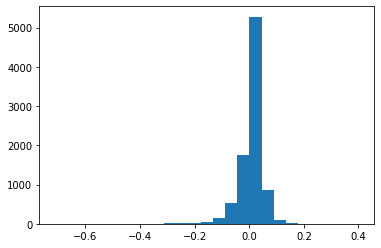

In [ ]:
plt.hist(allprofit, bins = 25)
plt.show()

In [ ]:
for i in matrixsignals:
  for e in i:
    if e.year == 2021:
      print(e)

2021-01-12 00:00:00-05:00
2021-06-17 00:00:00-04:00
2021-06-18 00:00:00-04:00
2021-06-21 00:00:00-04:00
2021-09-15 00:00:00-04:00
2021-09-16 00:00:00-04:00
2021-09-17 00:00:00-04:00
2021-09-20 00:00:00-04:00
2021-09-28 00:00:00-04:00
2021-09-29 00:00:00-04:00
2021-09-30 00:00:00-04:00
2021-10-01 00:00:00-04:00
2021-09-03 00:00:00-04:00
2021-09-07 00:00:00-04:00
2021-09-08 00:00:00-04:00
2021-05-05 00:00:00-04:00
2021-06-17 00:00:00-04:00
2021-06-18 00:00:00-04:00
2021-06-21 00:00:00-04:00
2021-06-22 00:00:00-04:00
2021-06-23 00:00:00-04:00
2021-06-24 00:00:00-04:00
2021-06-28 00:00:00-04:00
2021-06-29 00:00:00-04:00
2021-06-30 00:00:00-04:00
2021-07-01 00:00:00-04:00
2021-07-02 00:00:00-04:00
2021-07-06 00:00:00-04:00
2021-07-07 00:00:00-04:00
2021-07-08 00:00:00-04:00
2021-07-09 00:00:00-04:00
2021-07-15 00:00:00-04:00
2021-07-19 00:00:00-04:00
2021-07-20 00:00:00-04:00
2021-07-23 00:00:00-04:00
2021-09-28 00:00:00-04:00
2021-09-29 00:00:00-04:00
2021-09-30 00:00:00-04:00
2021-10-01 0